<a href="https://colab.research.google.com/github/samikshyasanskruti/Deep-Learning/blob/main/Preprocessing_Techniques_of_NN(Ass_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SAMIKSHYA SANSKRUTI**




**IMPORT REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
# Get the data

url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data=pd.read_csv(url,delimiter=';')


In [ ]:
#display the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**DATA EXPLORATION AND VISUALIZATION**

In [ ]:
print(data.info())
print (data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

In [ ]:
#check for missing values
print(data.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


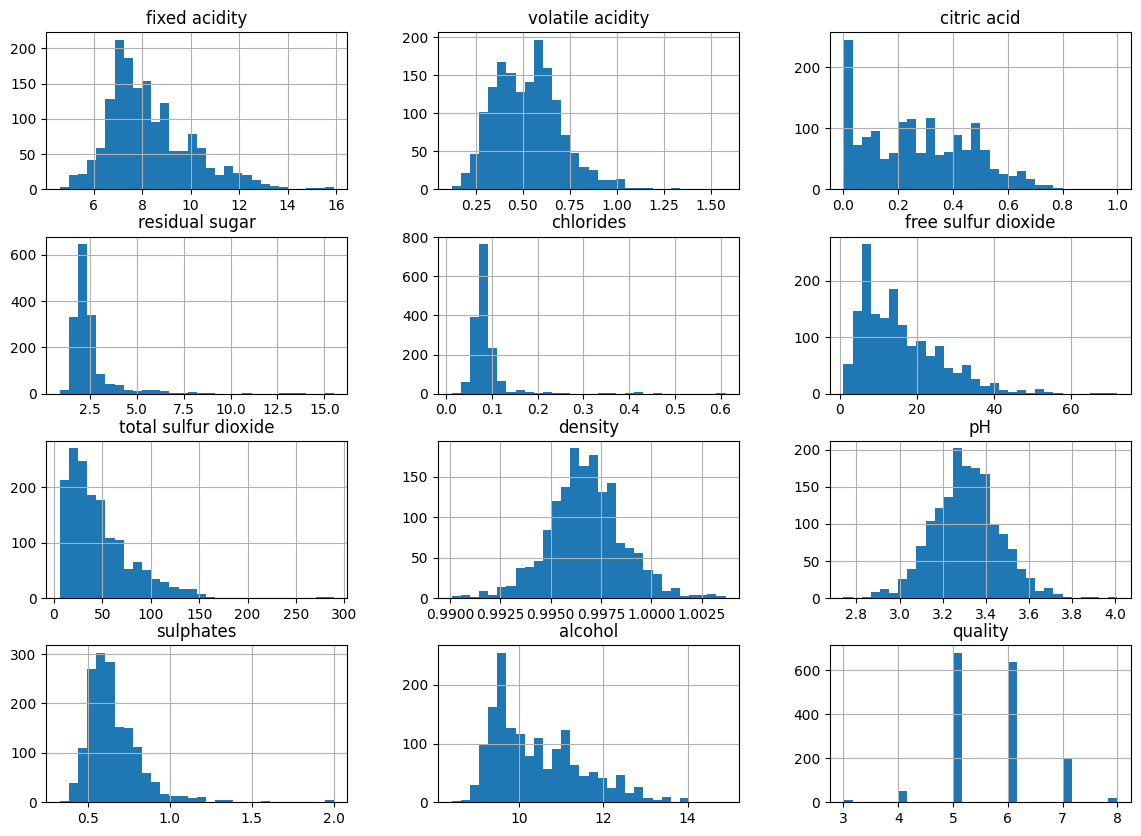

In [ ]:
#visualize feature distributions
data.hist(figsize=(14,10),bins=30)
plt.show()

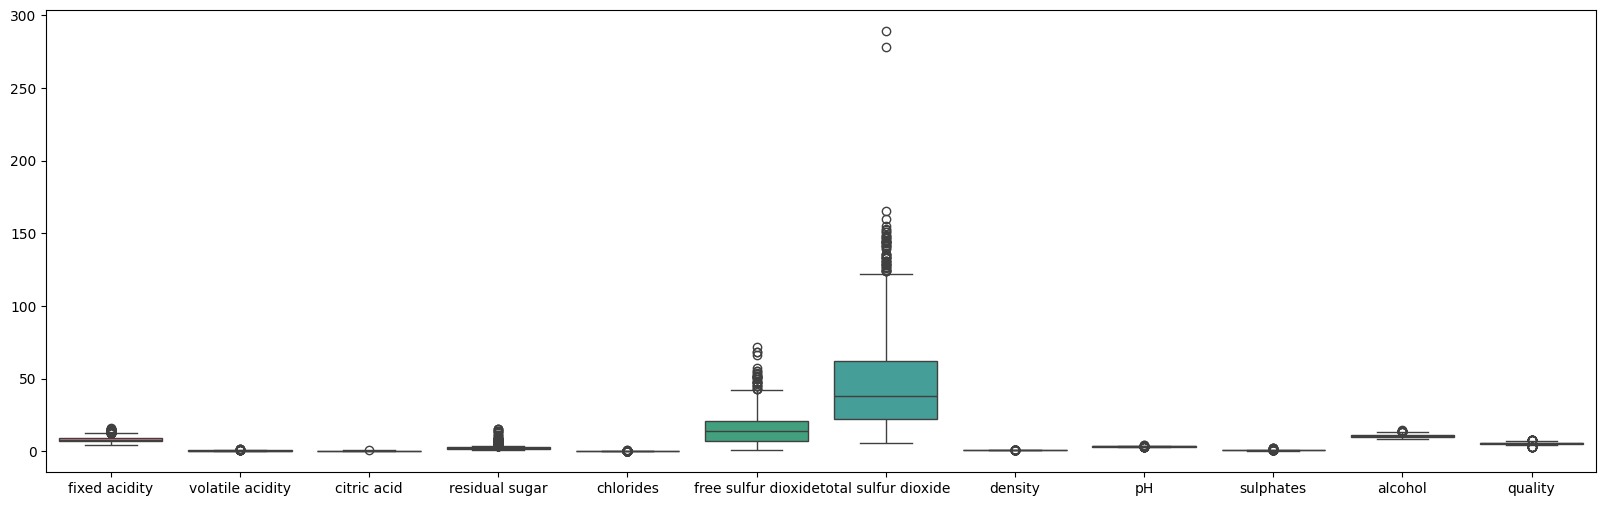

In [ ]:
#Boxplots to identify outliers
plt.figure(figsize=(20,6))
sns.boxplot(data=data)
plt.show()

**DATA CLEANING**

In [ ]:
#Handle Outliers using IQR
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

#Define outlier bounds
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Remove outliers
data_cleaned=data[~((data<lower_bound)|(data>upper_bound)).any(axis=1)]
print(f"Original Data Shape: {data.shape}")
print(f"Cleaned Data Shape: {data_cleaned.shape}")

Original Data Shape: (1599, 12)
Cleaned Data Shape: (1179, 12)


**(4) FEATURE ENGINEERING**

In [ ]:
#Bining alcohol levels
bins=[data['alcohol'].min(),10,12,data['alcohol'].max()]
labels=['Low','Medium','High']

#Apply bining
data['alcohol_category']=pd.cut(data['alcohol'],bins=bins,labels=labels)

#Display the first few rows
print(data[['alcohol','alcohol_category']].head())



   alcohol alcohol_category
0      9.4              Low
1      9.8              Low
2      9.8              Low
3      9.8              Low
4      9.4              Low


In [ ]:
#Encoding categorical feature

#Label Encoding
label_encoder=LabelEncoder()
data['alcohol_category_encoded']=label_encoder.fit_transform(data['alcohol_category'])

#One-Hot Encoding
data=pd.get_dummies(data,columns=['alcohol_category'],prefix='alc')

#print(data[['alcohol_category','alcohol_category_encoded']])
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  alcohol_category_encoded  alc_Low  alc_Medium  alc_High  
0      

**(5) FEATURE SCALING**

In [ ]:
# Normalization
data=data.select_dtypes(include=['number'])
scaler=MinMaxScaler()
data_normalized=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
print("First 5 rows after Min-Max Normalization:\n",data_normalized.head(),"\n")



First 5 rows after Min-Max Normalization:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  

In [ ]:
# Standardization

scaler=StandardScaler()
data_standardized=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
print("First 5 rows after Standardization:\n",data_standardized.head(),"\n")

First 5 rows after Standardization:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol   quali

**(6) FEATURE SELECTION(PCA)**

In [ ]:
pca=PCA(n_components=5)
data_pca=pca.fit_transform(data_standardized)

print("Explained Variance Ratios:\n",pca.explained_variance_ratio_,"\n")

Explained Variance Ratios:
 [0.24085513 0.1729386  0.13028467 0.09390926 0.07859434] 



**(7) TRAIN-TEST SPLITING**

In [ ]:
X=data_standardized
y=data['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)

X_train Shape: (1279, 13)
X_test Shape: (320, 13)


                                                   ***completed***